# Câu hỏi số 2: Những bộ phim có thời lượng dài (ví dụ > 2 tiếng) có xu hướng đạt điểm cao hơn phim ngắn không?

- **Mục tiêu**: 
    - Trong điện ảnh, các phim "bom tấn" hoặc phim tranh giải Oscar thường có thời lượng dài và được đầu tư kỹ lưỡng về kịch bản, dẫn đến điểm số thường cao hơn (bias).
    - Ngược lại, phim quá ngắn hoặc quá dài lê thê có thể bị trừ điểm. Trả lời được câu hỏi này quyết định xem có nên biến đổi dữ liệu thời lượng (ví dụ: chia nhóm "Ngắn", "Vừa", "Dài") hay giữ nguyên số liệu thô.

- **Các bước thực hiện**: Nhóm thực hiện các bước thực nghiệm sau:
    - Chia nhóm thời lượng thành 3 loại: Ngắn (<90p), Trung bình (90-120p), và Dài (>120p) để dễ so sánh.
    - Vẽ biểu đồ phân tán (Scatter Plot) để xem xu hướng tổng quan.
    - Vẽ biểu đồ hộp (Box Plot) để so sánh phân phối điểm số giữa các nhóm.
    - Tính toán các chỉ số thống kê cụ thể

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. Đọc dữ liệu:

In [2]:
try:
    df = pd.read_csv('IMDB_movies.csv')
    print("Đã tải dữ liệu thành công!")
except FileNotFoundError:
    print("Lỗi: Không tìm thấy file 'IMDB_movies.csv'.")
    

Đã tải dữ liệu thành công!


2. Phân nhóm thời lượng (Feature Engineering)

In [3]:
def classify_duration(minutes):
    if minutes < 90:
        return 'Ngắn (<90p)'
    elif minutes <= 120:
        return 'Trung bình (90-120p)'
    else:
        return 'Dài (>120p)'

df['run_time_group'] = df['run_time'].apply(classify_duration)

3. Trực quan hóa dữ liệu

In [4]:
plt.figure(figsize=(25, 6))

<Figure size 2500x600 with 0 Axes>

<Figure size 2500x600 with 0 Axes>

3.1. Biểu đồ 1: Scatter Plot với đường hồi quy
     giúp trả lời: Thời lượng tăng thì điểm có tăng tuyến tính không?

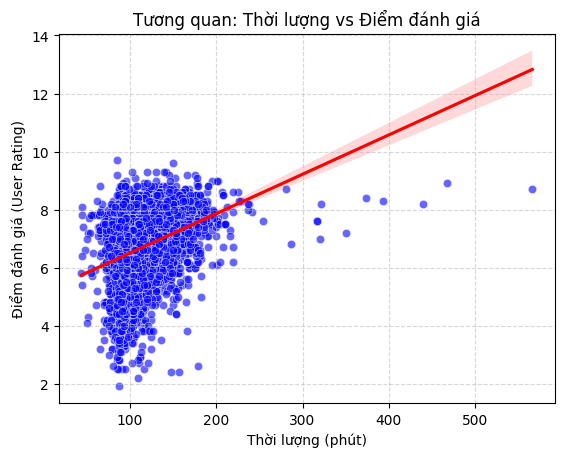

In [5]:
#plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='run_time', y='rating', alpha=0.6, color='blue')
sns.regplot(data=df, x='run_time', y='rating', scatter=False, color='red')
plt.title('Tương quan: Thời lượng vs Điểm đánh giá')
plt.xlabel('Thời lượng (phút)')
plt.ylabel('Điểm đánh giá (User Rating)')
plt.grid(True, linestyle='--', alpha=0.5)

Có thể thấy đám mây điểm có xu hướng "nhích" nhẹ lên cao khi đi về phía bên phải (thời lượng tăng). Đường hồi quy dốc lên cũng khẳng định điều này. Tuy nhiên, dữ liệu tập trung rất dày đặc ở khoảng 90-120 phút và loãng dần ở các phim quá dài (>180 phút).

=>  Có mối tương quan dương giữa thời lượng và chất lượng phim, tuy nhiên, độ phân tán (scatter) vẫn khá rộng

3.2. Biểu đồ 2: Box Plot theo nhóm
     giúp trả lời: Nhóm phim dài có thực sự "nhỉnh" hơn về điểm trung bình không?

C:\Users\asecr\AppData\Local\Temp\ipykernel_26308\97127919.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='run_time_group', y='rating', order=order_list, palette="Set2")


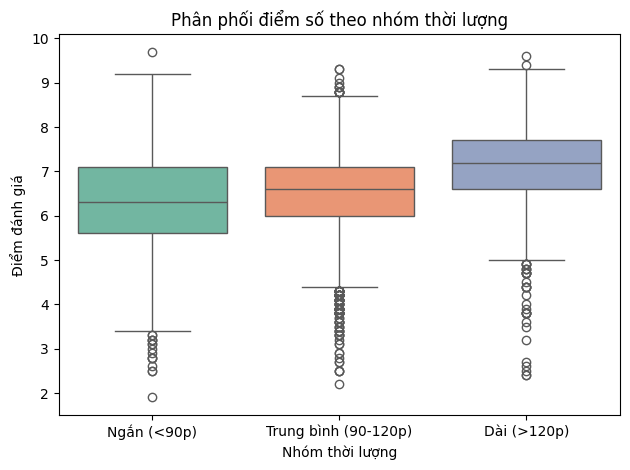

In [6]:
#plt.subplot(1, 2, 2)
order_list = ['Ngắn (<90p)', 'Trung bình (90-120p)', 'Dài (>120p)']
sns.boxplot(data=df, x='run_time_group', y='rating', order=order_list, palette="Set2")
plt.title('Phân phối điểm số theo nhóm thời lượng')
plt.xlabel('Nhóm thời lượng')
plt.ylabel('Điểm đánh giá')

plt.tight_layout()
plt.savefig('duration_analysis_result.png')
plt.show()

- **Nhóm dài >120p** nằm cao hơn hẳn hai nhóm còn lại. Đường trung vị nằm trên mức 7.0, trong khi hai nhóm kia chỉ khoảng 6.3 - 6.5.
- **Độ rủi ro**: Nhìn vào các chấm tròn (outlier - giá trị ngoại lai) ở phía dưới, nhóm phim Ngắn và Trung bình có rất nhiều phim điểm ở khoảng 2-3. Trong khi đó, nhóm phim Dài có "đáy" cao hơn, hiếm khi bị điểm quá thấp

4. Tính toán thống kê cụ thể

In [7]:
print("\n--- Thống kê chi tiết ---")
# Hệ số tương quan
corr = df['run_time'].corr(df['rating'])
print(f"Hệ số tương quan Pearson: {corr:.2f}")
if corr > 0.3:
    print("=> Có sự tương quan dương: Phim dài hơn có xu hướng điểm cao hơn.")
elif corr < -0.3:
    print("=> Có sự tương quan âm: Phim dài hơn có xu hướng điểm thấp hơn.")
else:
    print("=> Tương quan yếu hoặc không rõ ràng.")

# Điểm trung bình từng nhóm
print("\nĐiểm trung bình theo nhóm:")
print(df.groupby('run_time_group')['rating'].mean().reindex(order_list))


--- Thống kê chi tiết ---
Hệ số tương quan Pearson: 0.33
=> Có sự tương quan dương: Phim dài hơn có xu hướng điểm cao hơn.

Điểm trung bình theo nhóm:
run_time_group
Ngắn (<90p)             6.245830
Trung bình (90-120p)    6.520782
Dài (>120p)             7.130469
Name: rating, dtype: float64


- **Hệ số tương quan Pearson = 0.33**: mối tương quan dương ở mức độ trung bình (không quá mạnh nhưng đủ rõ ràng để bác bỏ sự ngẫu nhiên).
- **Điểm trung bình theo nhóm**: Có sự phân cấp rõ rệt. Nhóm phim "Ngắn" và "Trung bình" có điểm gần nhau (6.24 so với 6.52), nhưng nhóm phim "Dài" (>120p) cao hơn hẳn ở mức 7.13.


- **Nhận xét**: 
    - Làm phim dài "an toàn" hơn về mặt điểm số. Khán giả có xu hướng khắt khe hơn với phim ngắn/trung bình nhưng lại bao dung hoặc đánh giá cao nỗ lực của các phim dài hơi. Ngưỡng 120 phút (2 tiếng) là một cột mốc quan trọng. Các phim vượt qua mốc thời lượng này thường là các tác phẩm được đầu tư kỹ lưỡng hơn hoặc thuộc các thể loại được đánh giá cao (như Drama, History)